# Moose data

## Domain selection

In [2]:
import datetime
import os
from pathlib import Path

import numpy as np
import iris
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import xarray.plot as xplt
import cftime

from ml_downscaling_emulator.utils import cp_model_rotated_pole
platecarree = ccrs.PlateCarree()

In [9]:
ds = xr.open_dataset(Path(os.getenv("HOME"))/"cdt"/"summer"/"data"/"moose"/"uk"/"2.2km"/"rcp85"/"01"/"psl"/"day"/"psl_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.nc")

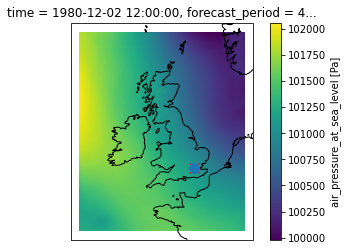

In [10]:
ax = plt.axes(projection=cp_model_rotated_pole)
ds.isel(time=1).air_pressure_at_sea_level.plot(ax=ax, x='grid_longitude', y='grid_latitude', transform=cp_model_rotated_pole)
ax.coastlines()
ax.plot(*cp_model_rotated_pole.transform_point(-0.118092, 51.509865, src_crs=platecarree), transform=cp_model_rotated_pole, marker='x', color='r', ms=10)
ax.plot(ds.grid_longitude.values[384], ds.grid_latitude.values[194], transform=cp_model_rotated_pole, marker='o', ms=10)
plt.show()

In [11]:
ds.grid_longitude.values[384]

361.49075

In [13]:
london_long_lat = (-0.118092, 51.509865)
london_rp = cp_model_rotated_pole.transform_point(*london_long_lat, src_crs=platecarree)

london_centre_ds = ds.sel(grid_longitude=360.0+london_rp[0], grid_latitude=london_rp[1], method="nearest")

In [14]:
london_rp

(1.482400554196857, -0.9656882994528234)

In [7]:
np.where(ds.grid_longitude.values == london_centre_ds.grid_longitude.values)

(array([384]),)

In [8]:
np.where(ds.grid_latitude.values == london_centre_ds.grid_latitude.values)

(array([194]),)

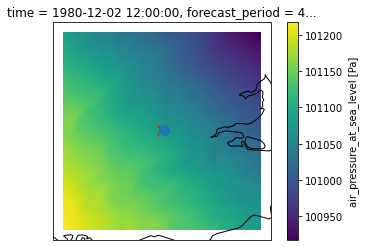

In [9]:


ax = plt.axes(projection=cp_model_rotated_pole)
ds.isel(grid_longitude=slice(384-32, 384+32), grid_latitude=slice(194-32, 194+32)).isel(time=1).air_pressure_at_sea_level.plot(ax=ax, x='grid_longitude', y='grid_latitude', transform=cp_model_rotated_pole)
ax.coastlines()
ax.plot(*cp_model_rotated_pole.transform_point(-0.118092, 51.509865, src_crs=platecarree), transform=cp_model_rotated_pole, marker='x', color='r', ms=10)
ax.plot(ds.grid_longitude.values[384], ds.grid_latitude.values[194], transform=cp_model_rotated_pole, marker='o', ms=10)
plt.show()

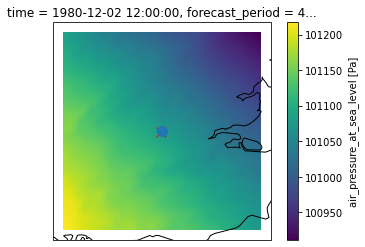

In [10]:
ax = plt.axes(projection=cp_model_rotated_pole)
ds.sel(grid_longitude=slice(ds.grid_longitude[384-32].values, ds.grid_longitude[384+32].values), grid_latitude=slice(ds.grid_latitude[194-32], ds.grid_latitude[194+32])).isel(time=1).air_pressure_at_sea_level.plot(ax=ax, x='grid_longitude', y='grid_latitude', transform=cp_model_rotated_pole)
ax.coastlines()
ax.plot(*cp_model_rotated_pole.transform_point(-0.118092, 51.509865, src_crs=platecarree), transform=cp_model_rotated_pole, marker='x', color='r', ms=10)
ax.plot(ds.grid_longitude.values[384], ds.grid_latitude.values[194], transform=cp_model_rotated_pole, marker='o', ms=10)
plt.show()

In [11]:
ds.sel(grid_longitude=slice(ds.grid_longitude[384-31].values, ds.grid_longitude[384+32].values), grid_latitude=slice(ds.grid_latitude[194-31].values, ds.grid_latitude[194+32].values))

<xarray.Dataset>
Dimensions:                     (bnds: 2, grid_latitude: 64, grid_longitude: 64, time: 360)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 1981-11...
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_period             (time) timedelta64[ns] ...
    forecast_reference_time     object ...
    realization                 int32 ...
Dimensions without coordinates: bnds
Data variables:
    air_pressure_at_sea_level   (time, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  int32 ...
    time_bnds                   (time, bnds) object ...
    grid_latitude_bnds          (grid_latitude, bnds) float32 ...
    grid_longitude_bnds         (grid_longitude, bnds) float32 ...
    forecast_period_bnds        (time, bnds) float64 ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

In [12]:
ds.grid_longitude[384-32].values, ds.grid_longitude[384+32].values

(array(360.85074, dtype=float32), array(362.13074, dtype=float32))

In [13]:
ds.grid_latitude[194-31].values, ds.grid_latitude[194+32].values

(array(-1.57995, dtype=float32), array(-0.31995, dtype=float32))

In [14]:
ds.sel(grid_longitude=slice(360.86076, 362.13074), grid_latitude=slice(-1.57995, -0.31995))#.grid_latitude.max()

<xarray.Dataset>
Dimensions:                     (bnds: 2, grid_latitude: 64, grid_longitude: 64, time: 360)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 1981-11...
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_period             (time) timedelta64[ns] 450 days 12:00:00 ... ...
    forecast_reference_time     object 1979-09-01 00:00:00
    realization                 int32 1100000
Dimensions without coordinates: bnds
Data variables:
    air_pressure_at_sea_level   (time, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  int32 -2147483647
    time_bnds                   (time, bnds) object 1980-12-01 00:00:00 ... 1...
    grid_latitude_bnds          (grid_latitude, bnds) float32 ...
    grid_longitude_bnds         (grid_longitude, bnds) float32 ...
    forecast_period_bnds        (time, bnds) float64 1.08e+04 ... 1.944e+04
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

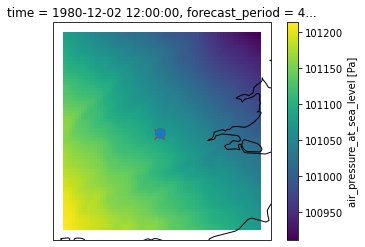

In [15]:
ax = plt.axes(projection=cp_model_rotated_pole)
ds.sel(grid_longitude=slice(360.86076, 362.13074), grid_latitude=slice(-1.57995, -0.31995)).isel(time=1).air_pressure_at_sea_level.plot(ax=ax, x='grid_longitude', y='grid_latitude', transform=cp_model_rotated_pole)
ax.coastlines()
ax.plot(*cp_model_rotated_pole.transform_point(-0.118092, 51.509865, src_crs=platecarree), transform=cp_model_rotated_pole, marker='x', color='r', ms=10)
ax.plot(ds.grid_longitude.values[384], ds.grid_latitude.values[194], transform=cp_model_rotated_pole, marker='o', ms=10)
plt.show()

In [16]:
london_ds = xr.load_dataset(Path(os.getenv("DERIVED_DATA"))/"moose"/"london"/"2.2km"/"rcp85"/"01"/"psl"/"day"/"psl_rcp85_land-cpm_london_2.2km_01_day_19801201-19811130.nc")

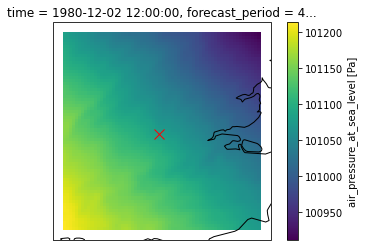

In [17]:
ax = plt.axes(projection=cp_model_rotated_pole)
london_ds.isel(time=1).psl.plot(ax=ax, x='grid_longitude', y='grid_latitude', transform=cp_model_rotated_pole)
ax.coastlines()
ax.plot(*cp_model_rotated_pole.transform_point(-0.118092, 51.509865, src_crs=platecarree), transform=cp_model_rotated_pole, marker='x', color='r', ms=10)
plt.show()

### xwind

In [24]:
xwind_cube = iris.load('../learning/xwind-mixedpsi-198112.nc')

In [25]:
xwind_cube

[<iris 'Cube' of x_wind / (m s-1) (time: 30; pressure: 2; grid_latitude: 655; grid_longitude: 532)>]

In [26]:
london_cp_rp_idx = (xwind_cube[0].coord('grid_longitude').nearest_neighbour_index(london_rp[0]+360), xwind_cube[0].coord('grid_latitude').nearest_neighbour_index(london_rp[1]))
london_cp_rp_idx

(384, 194)

In [29]:
london_xwind_cube = xwind_cube[0][:, :, (london_cp_rp_idx[1]-32):(london_cp_rp_idx[1]+32), (london_cp_rp_idx[0]-32):(london_cp_rp_idx[0]+32)]
iris.save(london_xwind_cube, '../learning/xwind-mixedpsi-london-19812.nc')
london_xwind_cube

<iris 'Cube' of x_wind / (m s-1) (time: 30; pressure: 2; grid_latitude: 64; grid_longitude: 64)>

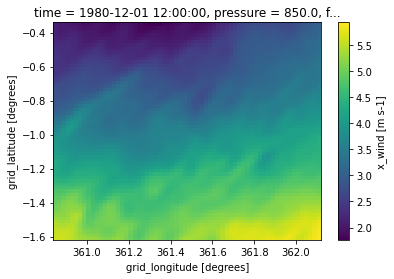

In [37]:
xr.DataArray.from_iris(london_xwind_cube).sel(pressure=850).isel(time=0).plot()

In [38]:
xr.load_dataset('../learning/xwind-mixedpsi-london-19812.nc')

<xarray.Dataset>
Dimensions:                     (bnds: 2, grid_latitude: 64, grid_longitude: 64, pressure: 2, time: 30)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 1980-12...
  * pressure                    (pressure) float32 20.0 850.0
  * grid_latitude               (grid_latitude) float32 -1.61 -1.59 ... -0.3499
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_period             (time) timedelta64[ns] 450 days 12:00:00 ... ...
    forecast_reference_time     object 1979-09-01 00:00:00
    realization                 int32 1100000
Dimensions without coordinates: bnds
Data variables:
    x_wind                      (time, pressure, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  int32 -2147483647
    time_bnds                   (time, bnds) object 1980-12-01 00:00:00 ... 1...
    grid_latitude_bnds          (grid_latitude, bnds) float32 -1.62 ... -0.3399
    grid_longitude_bnds         (grid_longitude, bnds) float32 360.8 ... 362.1
    forecast_period_bnds        (time, bnds) float64 1.08e+04 ... 1.152e+04
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

## Aggregating non-daily data

In [18]:
ds6hrinst = xr.open_dataset(Path(os.getenv("HOME"))/"cdt"/"summer"/"data"/"moose"/"uk"/"2.2km"/"rcp85"/"01"/"wetbulbpott"/"6hrinst"/"wetbulbpott_rcp85_land-cpm_uk_2.2km_01_6hrinst_19801201-19811130.nc")

In [19]:
ds6hrinst

<xarray.Dataset>
Dimensions:                         (bnds: 2, grid_latitude: 654, grid_longitude: 532, pressure: 10, time: 40)
Coordinates:
  * time                            (time) object 1980-12-01 00:00:00 ... 198...
  * pressure                        (pressure) float32 10.0 20.0 ... 400.0 1e+03
  * grid_latitude                   (grid_latitude) float32 -5.547 ... 8.927
  * grid_longitude                  (grid_longitude) float32 353.1 ... 365.2
    forecast_period                 (time) timedelta64[ns] ...
    forecast_reference_time         object ...
    realization                     int32 ...
Dimensions without coordinates: bnds
Data variables:
    wet_bulb_potential_temperature  (time, pressure, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude      int32 ...
    grid_latitude_bnds              (grid_latitude, bnds) float32 ...
    grid_longitude_bnds             (grid_longitude, bnds) float32 ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

In [20]:

offset = datetime.timedelta(hours=12)

ds1dm = ds6hrinst.resample(time="1D").mean()
ds1dmo = ds6hrinst.resample(time="1D", loffset=offset).mean()

In [21]:
ds1dmo.wet_bulb_potential_temperature.values == ds1dm.wet_bulb_potential_temperature.values

array([[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  T

In [22]:
ds.time[0:10].values == ds1dmo.time.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [23]:
dspreprocessed = xr.open_dataset(Path(os.getenv("HOME"))/"cdt"/"summer"/"derived_data"/"moose"/"london"/"2.2km-coarsened-8x"/"rcp85"/"01"/"wetbulbpott"/"day"/"wetbulbpott_rcp85_land-cpm_london_2.2km-coarsened-8x_01_day_19801201-19811130.nc")
dspreprocessed

<xarray.Dataset>
Dimensions:                     (bnds: 2, grid_latitude: 64, grid_longitude: 64, pressure: 10, time: 10)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 1980-12...
  * pressure                    (pressure) float32 10.0 20.0 ... 400.0 1e+03
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_reference_time     object ...
    realization                 int32 ...
Dimensions without coordinates: bnds
Data variables:
    wetbulbpott                 (time, pressure, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  (time) float64 ...
    grid_latitude_bnds          (time, grid_latitude, bnds) float32 ...
    grid_longitude_bnds         (time, grid_longitude, bnds) float32 ...

## London precip

In [3]:
pr_ds = xr.open_dataset(Path(os.getenv("HOME"))/"cdt"/"summer"/"derived_data"/"moose"/"london"/"2.2km"/"rcp85"/"01"/"pr"/"day"/"pr_rcp85_land-cpm_london_2.2km_01_day_19801201-19811130.nc")
pr27x_ds = xr.open_dataset(Path(os.getenv("HOME"))/"cdt"/"summer"/"derived_data"/"moose"/"london"/"2.2km-coarsened-27x"/"rcp85"/"01"/"pr"/"day"/"pr_rcp85_land-cpm_london_2.2km-coarsened-27x_01_day_19801201-19811130.nc")

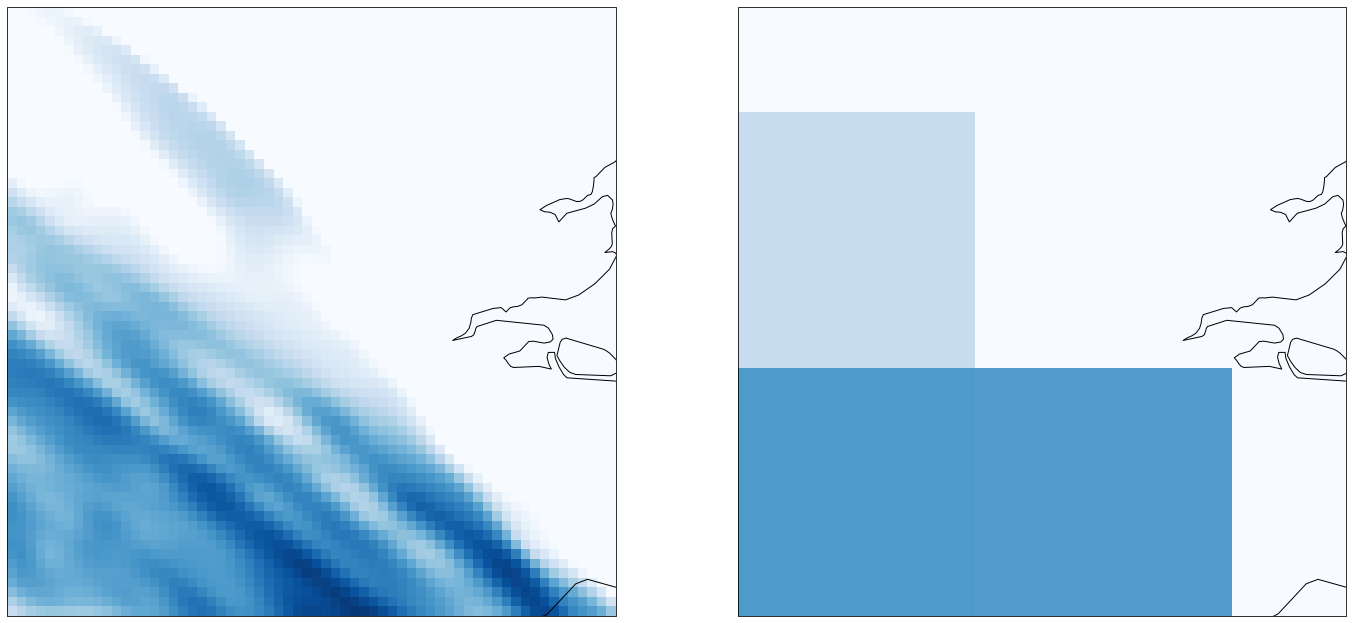

In [7]:
vmin=0.00001
vmax=0.00012

fig, axes = plt.subplots(1, 2, figsize=(24, 12), subplot_kw={'projection': cp_model_rotated_pole})
        
ax = axes[0]
ax.coastlines()
pr_ds.isel(time=165)["pr"].plot(ax=ax, cmap='Blues', vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm(), add_colorbar=False)
ax.set_title("")#("2.2km resolution precipitation over London")

ax = axes[1]
ax.coastlines()
pr27x_ds.isel(time=165)["pr"].plot(ax=ax, cmap='Blues', vmin=vmin, vmax=vmax, norm=matplotlib.colors.LogNorm(), add_colorbar=False)
ax.set_title("")#("Precipitation over London coarsened to match 60km resolution of the UKCP18 global model")

plt.show()


In [36]:
np.where(pr_ds.pr.values == pr_ds.pr.max().values)

(array([173]), array([0]), array([14]))